# Principal Component Analysis in Python

Principal Component Analysis is a method for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

This tutorial provides a step-by-step example of how to perform Principal Component Analysis in Python.

### Step 1: Load Necessary Libraries

First, we’ll load the necessary functions and libraries for this example:

In [109]:
from mpl_toolkits import mplot3d

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2: Load the Data
For this example, we’ll use the iris dataset from the sklearn library. The following code shows how to load this dataset and convert it to a pandas DataFrame to make it easy to work with:

In [110]:
# Load iris dataset
iris = datasets.load_iris()

# Convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target', 'species']

# View first six rows of DataFrame
df.head()

,sepal length,sepal width,petal length,petal width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


### Standardize the Data
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

In [111]:
# Select the features
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the species
y = df.loc[:,['species']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# View standardized data
standard_data = pd.DataFrame(x, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
standard_data.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Reduction of Dimensionality
The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 3 dimensions (n-1). I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the three main dimensions of variation.

In [112]:
# Selected the number of main components. Non-zero maximum is n-1
pca = PCA(n_components=len(features)-1)

# Get Principal Component
principalComponents = pca.fit_transform(x)

# Convert dataset to pandas DataFrame
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [113]:
# Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa


### Visualize 3D Projection
This section is just plotting 3 dimensional data. Notice on the graph below that the classes seem well separated from each other.

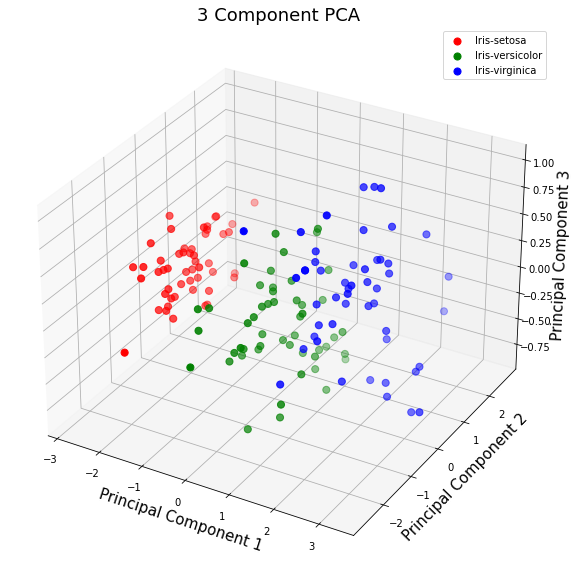

In [114]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")

species = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for species, color in zip(species,colors):
    indicesToKeep = finalDf['species'] == species
    ax.scatter3D(finalDf.loc[indicesToKeep, 'principal component 1'],
                 finalDf.loc[indicesToKeep, 'principal component 2'],
                 finalDf.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

    ax.set_title('3 Component PCA', fontsize=18)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

plt.show()

### See from another angle

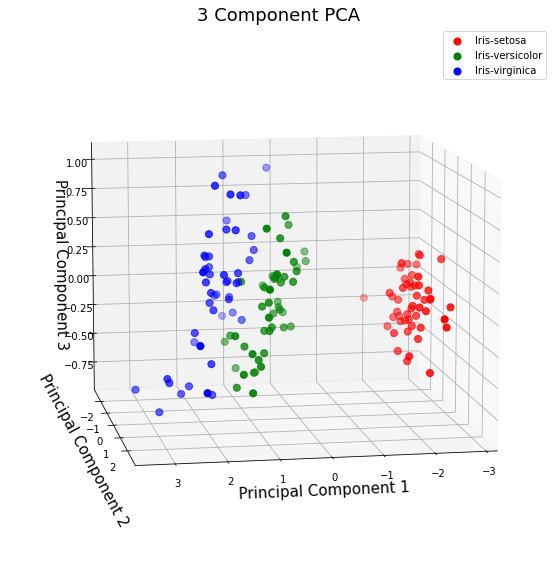

In [115]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")

species = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for species, color in zip(species,colors):
    indicesToKeep = finalDf['species'] == species
    ax.scatter3D(finalDf.loc[indicesToKeep, 'principal component 1'],
                 finalDf.loc[indicesToKeep, 'principal component 2'],
                 finalDf.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

    ax.set_title('3 Component PCA', fontsize=18)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
ax.view_init(10, 80)

plt.show()